# Data Science Case Study - Batch 9


### OBJECTIVE - This case study is around predicting whether a patient is suffering from Diabetes based on certain Diagnostic Measurements.

## Data Loading and Cleansing 

### Step 1 - Import the libraries that will be used in the notebook

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 2 - Read the CSV file and see the first five rows of data

In [256]:
df = pd.read_csv("Diabetes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 3 - As we can see that data is not having the header so we will specify the header to the data frame.

 0. Number of times pregnant
 1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 2. Diastolic blood pressure (mm Hg)
 3. Triceps skin fold thickness (mm)
 4. 2-Hour serum insulin (mu U/ml)
 5. Body mass index (weight in kg/(height in m)^2)
 6. Diabetes pedigree function
 7. Age (years)
 8. Class variable (0 or 1)


In [257]:
df.columns = ["NoTimePregnant", "GlucoseConcentration", "DiastolicBloodPressure", "TricepsSkinThickness","2HourSerumInsulin","BMI"
             ,"DPF","Age","Class"]
df.head()

,NoTimePregnant,GlucoseConcentration,DiastolicBloodPressure,TricepsSkinThickness,2HourSerumInsulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 4 - Lets see what all cleansing is required

In [258]:
df.describe()

,NoTimePregnant,GlucoseConcentration,DiastolicBloodPressure,TricepsSkinThickness,2HourSerumInsulin,BMI,DPF,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that min GlucoseConcentration, Diastolic BloodPressure and BMI is 0 which is not correct data. So we have to identify such cases and fix them

In [264]:
(df[["GlucoseConcentration","DiastolicBloodPressure","BMI","TricepsSkinThickness"]]==0).sum()

GlucoseConcentration        0
DiastolicBloodPressure      0
BMI                         0
TricepsSkinThickness      226
dtype: int64

As number of records for these attributes with invalid value is not High so we can either remove or impute them. Here I am Imputing them based on Average of value grouped by Age

In [261]:
df[["GlucoseConcentration","DiastolicBloodPressure","BMI"]] = df[["GlucoseConcentration","DiastolicBloodPressure","BMI"]].replace(0, np.NaN)

In [262]:
grouped = df.groupby(['Age'])
grouped.DiastolicBloodPressure.median()
grouped.GlucoseConcentration.median()
grouped.BMI.median()
df["DiastolicBloodPressure"] = grouped.DiastolicBloodPressure.apply(lambda x: x.fillna(x.median()))
df["GlucoseConcentration"] = grouped.GlucoseConcentration.apply(lambda x: x.fillna(x.median()))
df["BMI"] = grouped.BMI.apply(lambda x: x.fillna(x.median()))

In [263]:
df = df.dropna()
df.describe()

,NoTimePregnant,GlucoseConcentration,DiastolicBloodPressure,TricepsSkinThickness,2HourSerumInsulin,BMI,DPF,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.651890,72.325945,20.563233,79.903520,32.447262,0.471407,33.190352,0.349413
std,3.371117,30.476194,12.146221,15.945349,115.283105,6.877364,0.331289,11.684171,0.477096
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 5 - Now, we will Visualize the data to draw inferences

First of all, lets draw a Histogram for all parameters

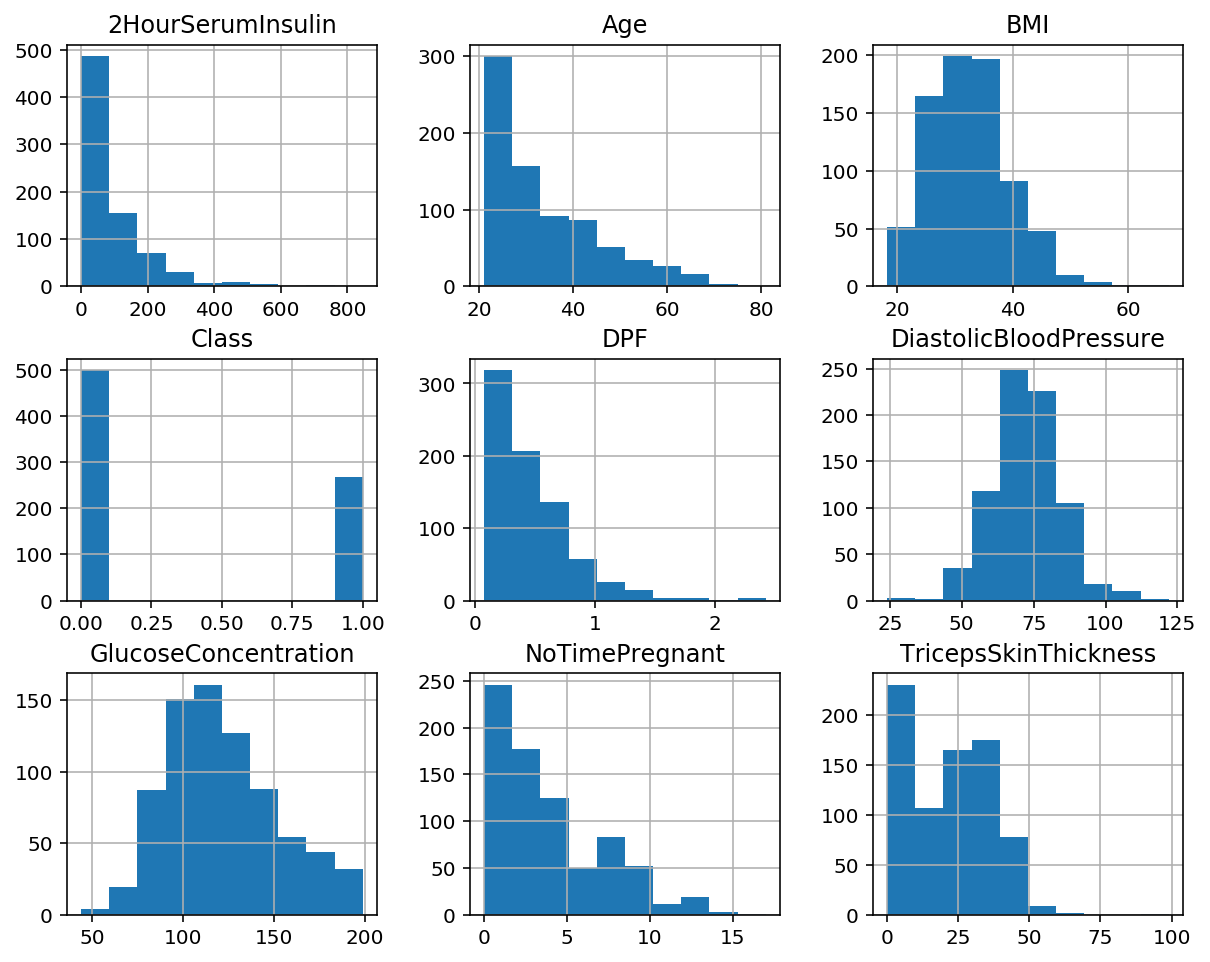

In [227]:
df.hist(figsize=(10,8));

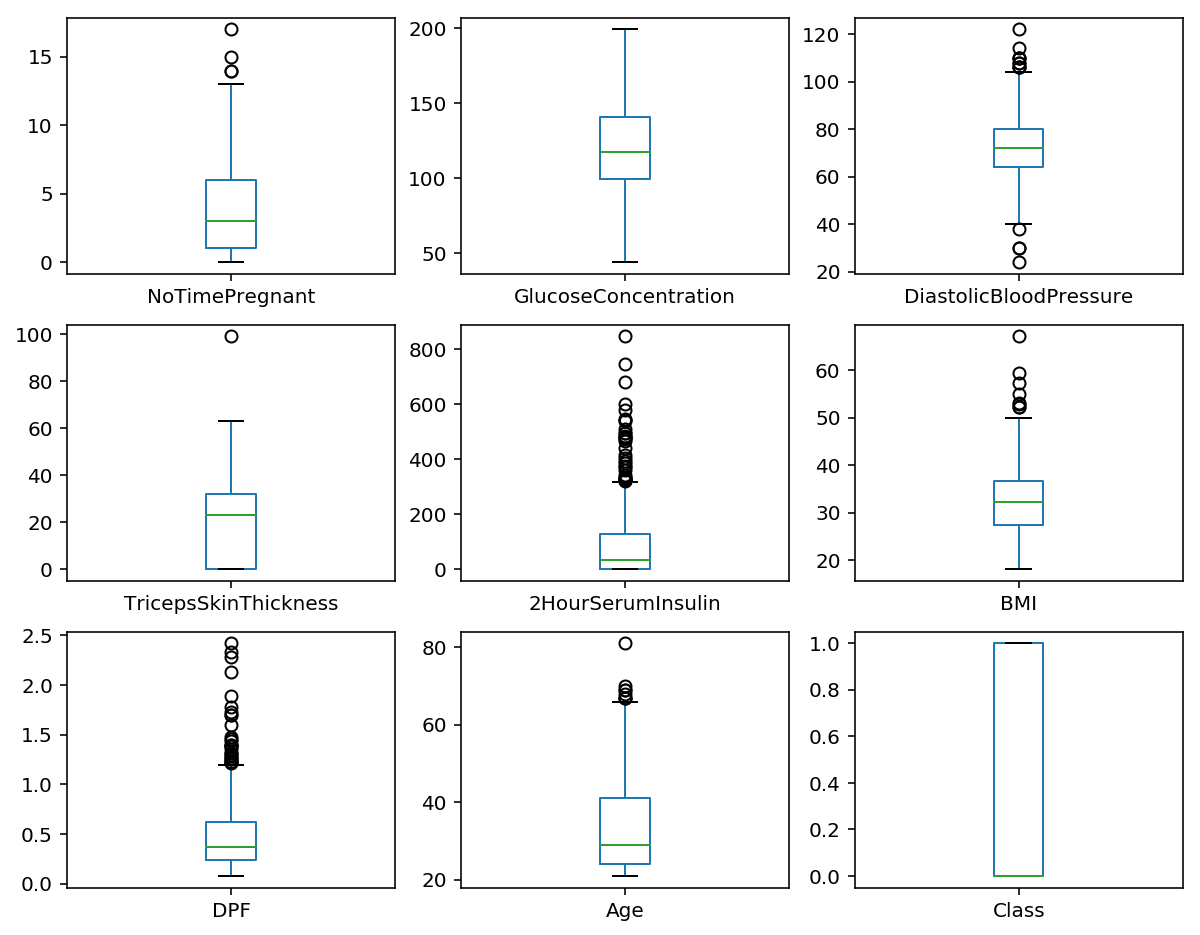

In [223]:
df.plot(kind="box",subplots=True,figsize=(10,8),layout=(3,3));

In [216]:
correlation = df[df.columns].corr()

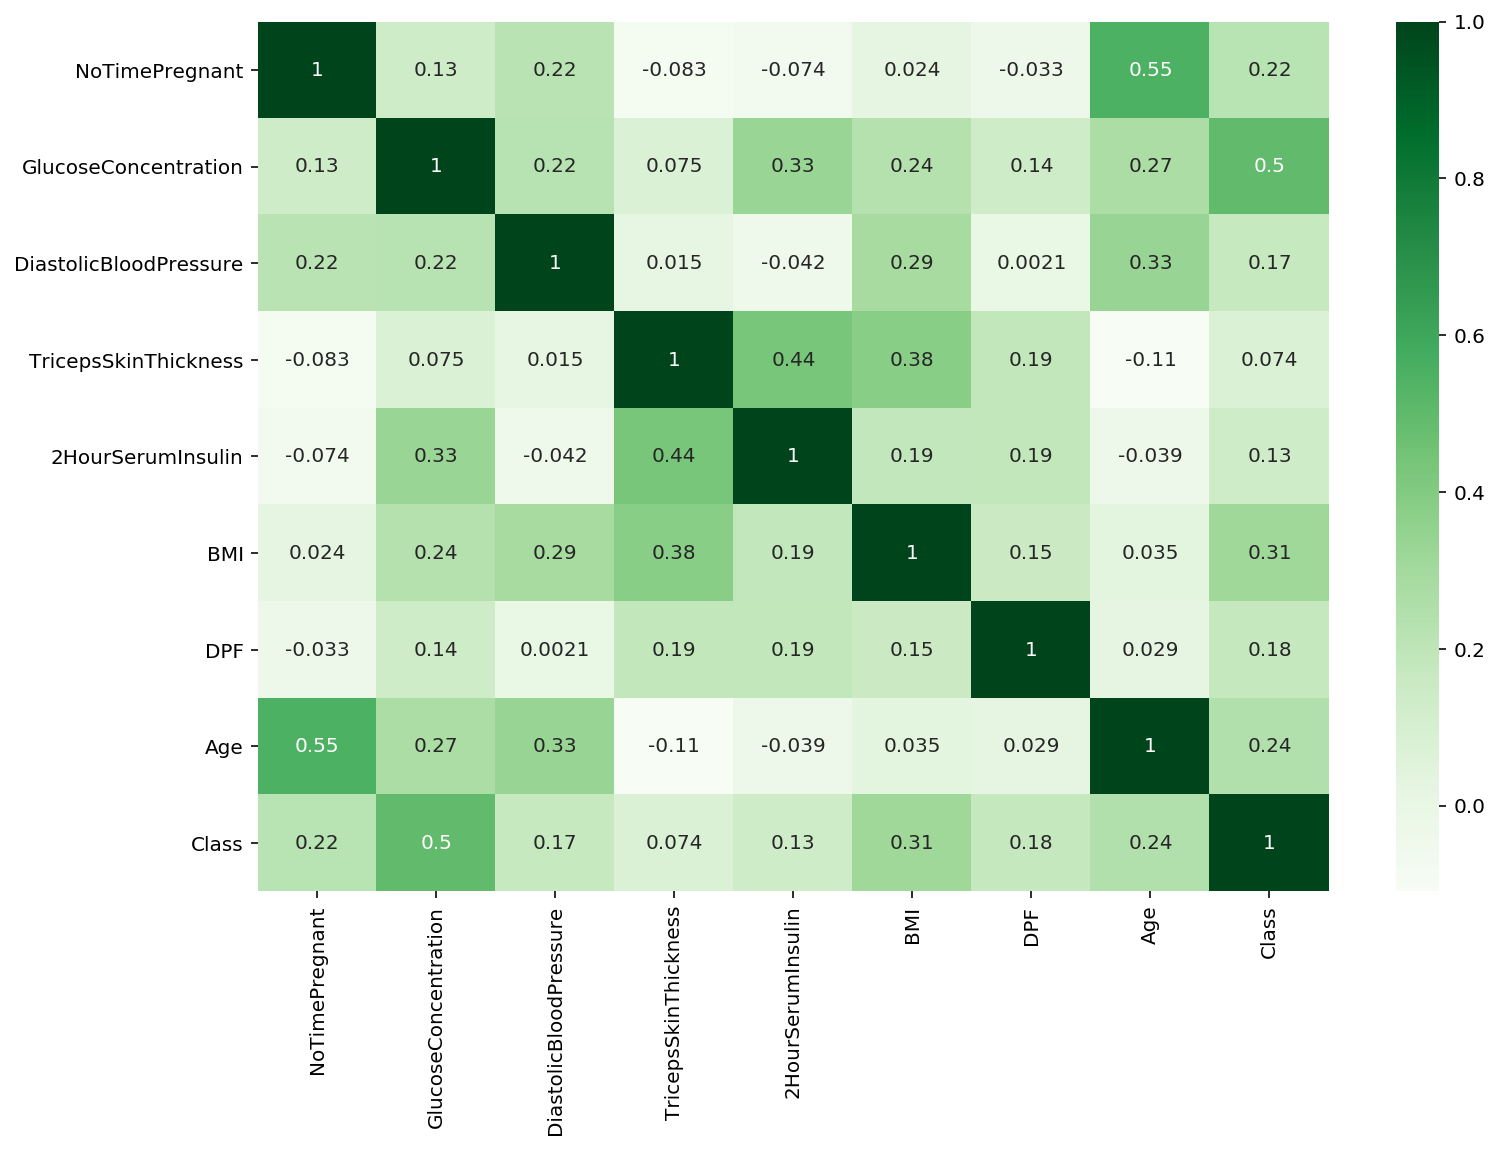

In [253]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True,cmap="Greens");

### There is no strong correlation between the attributes and we can't inference anything based on this data. So, we will apply Logistic Regression to create a Model for prediction

### Step 6: 